# Pandas training

Before you work with pandas library, you need to install following Python packages - <strong>pandas</strong>, <strong>openpyxl</strong> (to export data to Excel), <strong>sqlalchemy</strong> and <strong>cx_Oracle</strong> (to create the engine to connect to the Oracle database), <strong>bs4</strong>, <strong>lxml</strong>, <strong>html5lib</strong> (loading data from web)

In [16]:
import pandas as pd
from sqlalchemy import create_engine # to connect to the Oracle DB
import getpass # Python's standard library
import matplotlib.pyplot as plt # for plotting

# Reading files
Additional source: https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html.<br/>
Two types of objects:
* DataFrame
* Series

## read_csv function

In [76]:
df_vakances_raw = pd.read_csv(filepath_or_buffer='vakances-2022-05-04.csv')
print(f"{type(df_vakances_raw)=}")

type(df_vakances_raw)=<class 'pandas.core.frame.DataFrame'>


## read_excel function

In [77]:
df_xlsx_vakances = pd.read_excel(io='vakances-2022-05-04.xlsx')
print(f"{df_xlsx_vakances.shape=}")

df_xlsx_vakances.shape=(1478, 14)


In [107]:
df_other_xlsx = df_xlsx_vakances
print(id(df_xlsx_vakances), id(df_other_xlsx), id(df_xlsx_vakances) == id(df_other_xlsx))
# Same ID's, so they are same objects. Changes in one object will affect other object as well

1663864434320 1663864434320 True


## read_sql function
Engines: https://docs.sqlalchemy.org/en/14/core/engines.html

In [7]:
ci = {"user":"user_name", "host":"hostname", "port":1521, "database":"db_name"}
psw = getpass.getpass(f'Enter password to connect to the {ci["database"]} database: ')  
o_engine = create_engine(f'oracle://{ci["user"]}:{psw}@{ci["host"]}:{ci["port"]}/{ci["database"]}') # need also cx_Oracle package

Enter password to connect to the db_name database:  ····


In [6]:
df_db_sample = pd.read_sql(sql="""
    SELECT *
    FROM SCHEMA.TABLE_NAME
    WHERE DATE_COLUMN >= SYSDATE - 7
    ORDER BY DATE_COLUMN, COL1, COL2 
    """,
    con=o_engine)

print(df_db_sample.info()) # Liela saraksta gadījumā nerāda katras kolonnas info.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 126 entries, d_date to dt_created
dtypes: datetime64[ns](3), float64(28), int64(43), object(52)
memory usage: 1.2+ MB
None


## read_json function

In [8]:
dfjson = pd.read_json("https://jsonplaceholder.typicode.com/todos")
dfjson

,userId,id,title,completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False
3,1,4,et porro tempora,True
4,1,5,laboriosam mollitia et enim quasi adipisci qui...,False
...,...,...,...,...
195,10,196,consequuntur aut ut fugit similique,True
196,10,197,dignissimos quo nobis earum saepe,True
197,10,198,quis eius est sint explicabo,True
198,10,199,numquam repellendus a magnam,True


## read_html function

In [15]:
# Population density, area and population of countries and dependencies in Europe
dfhtml = pd.read_html('https://en.wikipedia.org/wiki/Area_and_population_of_European_countries')[1]
dfhtml

,Name,Population density(/km2),Area(km2),Population
0,Monaco,18960.0,2.02,38300
1,Gibraltar (UK),5011.0,6.7,33573
2,Vatican City,1684.0,0.49[a],825
3,Malta,1505.0,316,475701
4,Guernsey (UK),955.0,65,62063
...,...,...,...,...
56,Finland,16.0,338424,5521533
57,Norway,14.0,385203,5323933
58,Kazakhstan (European part),5.5,148000,813621
59,Iceland,3.5,102775,355620


# Get basic information from DataFrames/Series

## head method

In [78]:
df_vakances_raw.head(3)
# in R: head(df_vakances_raw)

,Vakances Nr,Aktualizācijas datums,Iestādes reģistrācijas numurs,Vakances nosaukums,Vakances kategorija,Alga no,Alga līdz,Slodzes tips,Darba laika veids,Darba stundas nedēļā,Pieteikšanās termiņš,Attēls,Vieta,Vakances paplašināts apraksts
0,220419-23,2022-04-29,44103015509,OTRREIZĒJO IZEJVIELU ŠĶIROTĀJS,Pakalpojumi,750.0,1000.0,Viena vesela slodze,NaN,NaN,2022-05-20,NaN,"Daibe, Stalbes pag., Cēsu nov.",https://cvvp.nva.gov.lv/#/pub/vakances/319927475
1,220503-43,2022-05-03,44103015509,GADĪJUMA DARBU STRĀDNIEKS,Pakalpojumi,500.0,500.0,Viena vesela slodze,NaN,NaN,2022-05-20,NaN,"Daibe, Stalbes pag., Cēsu nov.",https://cvvp.nva.gov.lv/#/pub/vakances/321151029
2,220503-61,2022-05-03,44103015509,ATKRITUMU SAVĀCĒJS,Pakalpojumi,700.0,800.0,Viena vesela slodze,NaN,NaN,2022-05-20,NaN,"Valmiera, Valmieras nov.",https://cvvp.nva.gov.lv/#/pub/vakances/321154098


## tail method

In [79]:
df_vakances_raw.tail(3)
# in R: tail(df_vakances_raw)

,Vakances Nr,Aktualizācijas datums,Iestādes reģistrācijas numurs,Vakances nosaukums,Vakances kategorija,Alga no,Alga līdz,Slodzes tips,Darba laika veids,Darba stundas nedēļā,Pieteikšanās termiņš,Attēls,Vieta,Vakances paplašināts apraksts
1475,220503-46,2022-05-03,90000043403,IEKŠĒJAIS AUDITORS,Valsts pārvalde,1045.0,1135.0,Viena vesela slodze,Normālais darba laiks,NaN,2022-05-13,NaN,"Lāčplēša iela 2, Valmiera, Valmieras nov.",https://cvvp.nva.gov.lv/#/pub/vakances/321151300
1476,220405-125,2022-04-29,90009226858,ZOBĀRSTS,Veselības aprūpe / Sociālā aprūpe,1000.0,1000.0,Nepilna slodze,Nepilnais darba laiks,NaN,2022-06-01,NaN,"Brīvības iela 29, Dagda, Krāslavas nov.",https://cvvp.nva.gov.lv/#/pub/vakances/319101963
1477,220228-169,2022-04-29,90009226858,FIZIOTERAPEITS,Veselības aprūpe / Sociālā aprūpe,1032.0,1032.0,Viena vesela slodze,Normālais darba laiks,NaN,2022-06-01,NaN,"Brīvības iela 29, Dagda, Krāslavas nov.",https://cvvp.nva.gov.lv/#/pub/vakances/316797306


## sample method

In [80]:
df_vakances_raw.sample(3)

,Vakances Nr,Aktualizācijas datums,Iestādes reģistrācijas numurs,Vakances nosaukums,Vakances kategorija,Alga no,Alga līdz,Slodzes tips,Darba laika veids,Darba stundas nedēļā,Pieteikšanās termiņš,Attēls,Vieta,Vakances paplašināts apraksts
1051,220408-62,2022-04-08,40003951628,SANITĀRS,Veselības aprūpe / Sociālā aprūpe,882.0,882.0,Viena vesela slodze,Normālais darba laiks,NaN,2022-05-07,NaN,"Hipokrāta iela 2, Rīga",https://cvvp.nva.gov.lv/#/pub/vakances/319406389
1297,211207-121,2022-05-02,90009118031,VISPĀRĒJĀS PAMATIZGLĪTĪBAS SKOLOTĀJS,Izglītība / Zinātne,333.0,333.0,Nepilna slodze,NaN,10.0,2022-05-18,NaN,"Lielplatones skola, Lielplatones pag., Jelgava...",https://cvvp.nva.gov.lv/#/pub/vakances/311168425
1387,220422-181,2022-04-22,90001262761,PIRMSSKOLAS IZGLĪTĪBAS SPORTA SKOLOTĀJS,Izglītība / Zinātne,735.0,735.0,Nepilna slodze,NaN,NaN,2022-05-20,NaN,"Rīgas iela 10, Salaspils, Salaspils nov.",https://cvvp.nva.gov.lv/#/pub/vakances/320325721


## dtypes attribute
More about dtypes - https://pandas.pydata.org/docs/user_guide/basics.html#dtypes

In [81]:
df_xlsx_vakances.dtypes

Vakances Nr                              object
Aktualizācijas datums            datetime64[ns]
Iestādes reģistrācijas numurs             int64
Vakances nosaukums                       object
Vakances kategorija                      object
Alga no                                 float64
Alga līdz                               float64
Slodzes tips                             object
Darba laika veids                        object
Darba stundas nedēļā                    float64
Pieteikšanās termiņš                     object
Attēls                                  float64
Vieta                                    object
Vakances paplašināts apraksts            object
dtype: object

Types:
* int64 - integer
* float64 - float
* object - string
* datetime64[ns] - datetime
* bool - boolean

## info method

In [82]:
df_xlsx_vakances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Vakances Nr                    1478 non-null   object        
 1   Aktualizācijas datums          1478 non-null   datetime64[ns]
 2   Iestādes reģistrācijas numurs  1478 non-null   int64         
 3   Vakances nosaukums             1478 non-null   object        
 4   Vakances kategorija            1478 non-null   object        
 5   Alga no                        1478 non-null   float64       
 6   Alga līdz                      1478 non-null   float64       
 7   Slodzes tips                   1178 non-null   object        
 8   Darba laika veids              798 non-null    object        
 9   Darba stundas nedēļā           390 non-null    float64       
 10  Pieteikšanās termiņš           1478 non-null   object        
 11  Attēls           

## shape attribute

In [83]:
print(df_vakances_raw.shape) # (No. of rows, No. of columns) as tuple 
print(type(df_vakances_raw.shape))
# in R: dim(df_vakances_raw)

(1478, 14)
<class 'tuple'>


## describe method

In [108]:
print(df_vakances_raw.describe())
# count, mean, std, min, 25%, 50%, 75%, max

       Iestādes reģistrācijas numurs       Alga no     Alga līdz  \
count                   1.478000e+03   1478.000000   1478.000000   
mean                    7.042215e+10    916.101633   1046.719901   
std                     2.502729e+10    548.359565    656.970523   
min                     1.119010e+08      2.720000      2.840000   
25%                     4.090004e+10    619.610000    700.000000   
50%                     9.000003e+10    887.500000   1000.000000   
75%                     9.000081e+10   1093.000000   1286.000000   
max                     9.001163e+10  10280.000000  12700.000000   

       Darba stundas nedēļā  Attēls  
count            390.000000     0.0  
mean              35.115385     NaN  
std               10.731810     NaN  
min                0.000000     NaN  
25%               40.000000     NaN  
50%               40.000000     NaN  
75%               40.000000     NaN  
max               48.000000     NaN  


In [118]:
# Use .loc, to include some of statistics
print(df_vakances_raw.describe().loc[["count", "mean"],["Alga no", "Alga līdz", "Darba stundas nedēļā"]])
# Same as:
# df_vakances_raw[["Alga no", "Alga līdz", "Darba stundas nedēļā"]].describe().loc[["count", "mean"]]

           Alga no    Alga līdz  Darba stundas nedēļā
count  1478.000000  1478.000000            390.000000
mean    916.101633  1046.719901             35.115385


In [120]:
# include=['O'] or include=['object']
print(df_vakances_raw.describe(include=['O'])) # statistics for non-numeric Series
# count, unique, top, freq

       Vakances Nr Aktualizācijas datums     Vakances nosaukums  \
count         1478                  1478                   1478   
unique        1478                    49                    398   
top      220419-23            2022-05-02  MĀSA (MEDICĪNAS MĀSA)   
freq             1                   181                     42   

       Vakances kategorija         Slodzes tips      Darba laika veids  \
count                 1478                 1178                    798   
unique                  20                    2                      4   
top        Valsts pārvalde  Viena vesela slodze  Normālais darba laiks   
freq                   393                 1009                    566   

       Pieteikšanās termiņš                          Vieta  \
count                  1478                           1478   
unique                   50                            669   
top              2022-05-31  Vasarnīcu iela 20, Daugavpils   
freq                    198                  

## columns property

In [86]:
print(f'{type(df_vakances_raw.columns)}') # 'pandas.core.indexes.base.Index'
print(df_vakances_raw.columns)

print(f'\n{type(df_vakances_raw.columns.values)}') # 'numpy.ndarray'
print(df_vakances_raw.columns.values)

print(f'\n{type(df_vakances_raw.columns.values.tolist())}') # 'list'
print(df_vakances_raw.columns.values.tolist())
# Same as: df_vakances_raw.columns.tolist()

<class 'pandas.core.indexes.base.Index'>
Index(['Vakances Nr', 'Aktualizācijas datums', 'Iestādes reģistrācijas numurs',
       'Vakances nosaukums', 'Vakances kategorija', 'Alga no', 'Alga līdz',
       'Slodzes tips', 'Darba laika veids', 'Darba stundas nedēļā',
       'Pieteikšanās termiņš', 'Attēls', 'Vieta',
       'Vakances paplašināts apraksts'],
      dtype='object')

<class 'numpy.ndarray'>
['Vakances Nr' 'Aktualizācijas datums' 'Iestādes reģistrācijas numurs'
 'Vakances nosaukums' 'Vakances kategorija' 'Alga no' 'Alga līdz'
 'Slodzes tips' 'Darba laika veids' 'Darba stundas nedēļā'
 'Pieteikšanās termiņš' 'Attēls' 'Vieta' 'Vakances paplašināts apraksts']

<class 'list'>
['Vakances Nr', 'Aktualizācijas datums', 'Iestādes reģistrācijas numurs', 'Vakances nosaukums', 'Vakances kategorija', 'Alga no', 'Alga līdz', 'Slodzes tips', 'Darba laika veids', 'Darba stundas nedēļā', 'Pieteikšanās termiņš', 'Attēls', 'Vieta', 'Vakances paplašināts apraksts']


# Filtering and selecting data
## Select single column

In [102]:
s_place = df_vakances_raw['Vieta'] # will be Series
print(f"{type(s_place)=}\n") # 'pandas.core.series.Series'
print(f'{s_place.shape=}\n') # shape for Series will return tuple with one value - Number of elements (i.e. rows)
s_place.tail() # Last 5 records from s_place Series

type(s_place)=<class 'pandas.core.series.Series'>

s_place.shape=(1478,)



1473    Parka iela 2, Zilaiskalns, Zilākalna pag., Val...
1474              Rīgas iela 10, Valmiera, Valmieras nov.
1475            Lāčplēša iela 2, Valmiera, Valmieras nov.
1476              Brīvības iela 29, Dagda, Krāslavas nov.
1477              Brīvības iela 29, Dagda, Krāslavas nov.
Name: Vieta, dtype: object

In [103]:
df_place = df_vakances_raw[['Vieta']] # will be DataFrame
print(f"{type(df_place)=}\n") # 'pandas.core.frame.DataFrame'
print(f'{df_place.shape=}\n') # shape for DataFrame - number of elements (i.e. rows) and number of columns
df_place.tail() # Last 5 records from df_place DataFrame

type(df_place)=<class 'pandas.core.frame.DataFrame'>

df_place.shape=(1478, 1)



,Vieta
1473,"Parka iela 2, Zilaiskalns, Zilākalna pag., Val..."
1474,"Rīgas iela 10, Valmiera, Valmieras nov."
1475,"Lāčplēša iela 2, Valmiera, Valmieras nov."
1476,"Brīvības iela 29, Dagda, Krāslavas nov."
1477,"Brīvības iela 29, Dagda, Krāslavas nov."


## Get values from datetime column
More about .dt accessor - https://pandas.pydata.org/docs/user_guide/basics.html#dt-accessor

In [88]:
# Using .dt accessor
    # .dt.year, .dt.month, .dt.day, .dt.day_name(), .dt.hour, .dt.minute, .dt.second
    # .dt.isocalendar(), .dt.isocalendar().year, .dt.isocalendar().week, .dt.isocalendar().day
df_xlsx_vakances["Aktualizācijas datums"].dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
1473    2022
1474    2022
1475    2022
1476    2022
1477    2022
Name: Aktualizācijas datums, Length: 1478, dtype: int64

## Select multiple columns

In [90]:
# ! Multiple column names must be in the list
df_job_place = df_vakances_raw[['Vakances Nr','Vieta']]
print(f"\n{type(df_job_place)=}\n") # 'pandas.core.frame.DataFrame'
print(f'{df_job_place.shape=}\n') # (No. of rows, No. of columns) as tuple
df_job_place.sample(3)


type(df_job_place)=<class 'pandas.core.frame.DataFrame'>

df_job_place.shape=(1478, 2)



,Vakances Nr,Vieta
395,220503-543,"Peldu iela 25, Rīga"
248,220503-29,"Ziepniekkalna iela 70, Rīga"
1204,220419-318,"Smiltaiņi, Iecava, Bauskas nov."


## Select columns based on dtype

In [91]:
# "number", "int", "float", "bool", "datetime", "timedelta", "object" etc.
df_xlsx_vakances.select_dtypes(include=["number"], exclude=["int"]).sample(3)
# include= includes dtypes, exclude= excludes dtypes

,Alga no,Alga līdz,Darba stundas nedēļā,Attēls
1014,560.0,700.0,40.0,NaN
587,1943.0,1943.0,NaN,NaN
741,500.0,500.0,40.0,NaN


## Select all columns but one
### drop method

In [92]:
# .drop() by default does not operate inplace
# do inplace=True if you want to permanently remove column(s)
df_all_cols_but_one = df_xlsx_vakances.drop('Vakances Nr',axis=1)
print(f'{df_all_cols_but_one.shape=}')
#df_vakances_raw.drop(axis=1) # axis=0 (default) - drop by index, axis=1 - drop by column name

df_all_cols_but_one.shape=(1478, 13)


### loc property

In [93]:
# colon (:) is mandatory (it means that you want to select all rows)
# This method don't work if columns are MultiIndex
df_all_cols_but_one = df_xlsx_vakances.loc[:, df_xlsx_vakances.columns != 'Vakances Nr']
print(f'{df_all_cols_but_one.shape=}')

df_all_cols_but_one.shape=(1478, 13)


## Filtering DataFrame (single condition)

In [94]:
df_salary_GT_2000 = df_vakances_raw[df_vakances_raw['Alga no']>2000]
print(f'{df_salary_GT_2000.shape=}')
df_salary_GT_2000[['Vakances nosaukums','Alga no','Alga līdz']].sort_values('Alga no',ascending=False).head(5)

df_salary_GT_2000.shape=(32, 14)


,Vakances nosaukums,Alga no,Alga līdz
539,VALDES LOCEKLIS,10280.0,12700.0
309,INFORMĀCIJAS TEHNOLOĢIJU STRUKTŪRVIENĪBAS VADĪ...,4800.0,5200.0
1027,"ANESTEZIOLOGS, REANIMATOLOGS",3600.0,3600.0
668,VALDES LOCEKLIS,3500.0,3500.0
1363,OFTALMOLOGS,3500.0,3500.0


## notna method

In [95]:
df_is_wh_types = df_vakances_raw[df_vakances_raw['Darba laika veids'].notna()]
print(f'{df_is_wh_types.shape=}')
df_is_wh_types[['Iestādes reģistrācijas numurs','Darba laika veids']].sort_values('Iestādes reģistrācijas numurs').head(5)

df_is_wh_types.shape=(798, 14)


,Iestādes reģistrācijas numurs,Darba laika veids
715,111900989,Normālais darba laiks
55,2013901280,Normālais darba laiks
51,2013901280,Normālais darba laiks
52,2013901280,Normālais darba laiks
53,2013901280,Normālais darba laiks


## loc property

In [96]:
# select row (using loc property) by index
df_vakances_raw.loc[[1000,1100]]
# df_vakances_raw.loc[1000] # filtering one row

# 1000 & 1100 - is a name of the index and not the position

,Vakances Nr,Aktualizācijas datums,Iestādes reģistrācijas numurs,Vakances nosaukums,Vakances kategorija,Alga no,Alga līdz,Slodzes tips,Darba laika veids,Darba stundas nedēļā,Pieteikšanās termiņš,Attēls,Vieta,Vakances paplašināts apraksts
1000,220503-345,2022-05-03,90000012723,SKOLOTĀJA PALĪGS,Izglītība / Zinātne,700.0,700.0,NaN,NaN,NaN,2022-05-31,NaN,"Parka iela 5, Rīga",https://cvvp.nva.gov.lv/#/pub/vakances/321203775
1100,220503-629,2022-05-03,90000052497,TEHNISKAIS STRĀDNIEKS,Cita,265.0,265.0,NaN,NaN,NaN,2022-05-31,NaN,"Bērzu iela 54, Ventspils",https://cvvp.nva.gov.lv/#/pub/vakances/321250711


## isin method

In [11]:
df_is_wh_types = df_vakances_raw[df_vakances_raw['Alga no'].isin([1000,2000])]
# only list-like objects are allowed to be passed to isin(), i.e., isin(1000) is not allowed, but isin([1000]) is.

print(f'{df_is_wh_types.shape=}')

df_is_wh_types.shape=(61, 14)


## Filtering DataFrame (multiple conditions)
When combining multiple conditional statements,
each condition must be surrounded by parentheses ().
Moreover, you can not use or/and but need to use the or operator | and the and operator &.

In [97]:
df_salary_GT_1500 = df_vakances_raw[(df_vakances_raw['Alga no']>1500) &
(df_vakances_raw['Alga no']!=df_vakances_raw['Alga līdz'])]
df_salary_GT_1500[['Vakances nosaukums','Alga no','Alga līdz']].sort_values('Alga no').head(3)

,Vakances nosaukums,Alga no,Alga līdz
333,ĀRSTS (EKSPERTS),1530.0,1700.0
1044,PAŠVALDĪBAS IESTĀDES VADĪTĀJS /PRIEKŠNIEKS,1534.0,1917.0
943,Neatliekamās medicīnas ĀRSTA PALĪGS/ FELDŠERIS,1550.0,1783.0


In [13]:
# You can define filter result separately and use it later
filter_cond = (df_vakances_raw['Alga no']>1500) & (df_vakances_raw['Alga no']!=df_vakances_raw['Alga līdz'])
print(type(filter_cond)) # <class 'pandas.core.series.Series'>

df_vakances_raw.loc[filter_cond,['Vakances nosaukums','Alga no','Alga līdz']].sort_values('Alga no').head(3)

<class 'pandas.core.series.Series'>


,Vakances nosaukums,Alga no,Alga līdz
333,ĀRSTS (EKSPERTS),1530.0,1700.0
1044,PAŠVALDĪBAS IESTĀDES VADĪTĀJS /PRIEKŠNIEKS,1534.0,1917.0
943,Neatliekamās medicīnas ĀRSTA PALĪGS/ FELDŠERIS,1550.0,1783.0


## Selecting AND filtering DataFrame
The loc/iloc operators are required in front of the selection brackets
When using loc/iloc, the part BEFORE the comma is the rows you want, and the part AFTER the comma is the columns you want to select.<br/><br/>
When using the <u>column names</u>, <u>row labels</u> or <u>a condition expression</u>, use the <strong>loc</strong> operator in front of the selection brackets [].
For both the part before and after the comma, you can use:
- a single label,
- a list of labels,
- a slice of labels,
- a conditional expression or a colon.
Using a colon specifies you want to select all rows or columns.

When specifically interested in certain rows and/or columns <u>based on their position</u> in the table, use the <strong>iloc</strong> operator in front of the selection brackets [].
More about indexing and selecting data: https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-choice.

In [15]:
salary_filter = df_vakances_raw['Alga no']>1500 # condition expression
column_filter = ['Alga no','Vakances paplašināts apraksts'] # using column names
df_salary_GT_1500_links = df_vakances_raw.loc[salary_filter,column_filter]
df_salary_GT_1500_links.sort_values('Alga no').head(5)

,Alga no,Vakances paplašināts apraksts
85,1524.0,https://cvvp.nva.gov.lv/#/pub/vakances/320704917
333,1530.0,https://cvvp.nva.gov.lv/#/pub/vakances/319674246
1044,1534.0,https://cvvp.nva.gov.lv/#/pub/vakances/320872167
1414,1550.0,https://cvvp.nva.gov.lv/#/pub/vakances/319216202
291,1550.0,https://cvvp.nva.gov.lv/#/pub/vakances/320775594


# Grouping data
## groupby property

In [51]:
# Save result as a Series (grouping by one column)
grouped_res = df_xlsx_vakances.groupby(["Alga no"])["Alga līdz"].count() # will not show column "Alga līdz"
print(grouped_res.sort_values(ascending=False).head(5)) # do not need to define column inside sort_values (because there's no columns)
print(type(grouped_res)) # <class 'pandas.core.series.Series'>

Alga no
835.0     80
500.0     66
940.0     40
1000.0    39
1500.0    37
Name: Alga līdz, dtype: int64
<class 'pandas.core.series.Series'>


In [98]:
# Save result as a DataFrame (grouping by one column)
# "Alga līdz" is in double square brackets
grouped_res2 = df_xlsx_vakances.groupby(["Alga no"])[["Alga līdz"]].count() # single column dataframe
print(type(grouped_res2)) # <class 'pandas.core.frame.DataFrame'>
grouped_res2.sort_values("Alga līdz", ascending=False).head(5) # must define column name inside sort_values, otherwise will not work

<class 'pandas.core.frame.DataFrame'>


,Alga līdz
Alga no,
835.0,80
500.0,66
940.0,40
1000.0,39
1500.0,37


In [99]:
# Grouping by multiple columns
grouped_res3 = df_xlsx_vakances.groupby(["Slodzes tips", "Darba laika veids"])[["Alga līdz"]].count()
print(type(grouped_res3))
grouped_res3.sort_values(["Slodzes tips", "Darba laika veids"])

<class 'pandas.core.frame.DataFrame'>


Alga līdz
Slodzes tips        Darba laika veids               
Nepilna slodze      Nepilnais darba laiks         33
                    Normālais darba laiks         32
                    Summētais darba laiks         19
Viena vesela slodze Maiņu darbs                   20
                    Nepilnais darba laiks          1
                    Normālais darba laiks        527
                    Summētais darba laiks        142

# Modify DataFrame/Series
## Change values using loc property

In [12]:
# Fill all rows with "(n/z)" in 11th column
df_vakances_raw.iloc[:, 11] = "(n/z)"

## Change all columns to strings - applymap method

In [123]:
df_all_strings = df_vakances_raw.applymap(str)
df_all_strings.dtypes

Vakances Nr                      object
Aktualizācijas datums            object
Iestādes reģistrācijas numurs    object
Vakances nosaukums               object
Vakances kategorija              object
Alga no                          object
Alga līdz                        object
Slodzes tips                     object
Darba laika veids                object
Darba stundas nedēļā             object
Pieteikšanās termiņš             object
Attēls                           object
Vieta                            object
Vakances paplašināts apraksts    object
dtype: object

## Change column names

In [31]:
df_vakances_raw = df_vakances_raw.rename(columns = str.lower) # all names to lowercase

# Rename some columns
    # In a dictionary - "old name": "new name"
df_vakances_raw = df_vakances_raw.rename(columns = {"iestādes reģistrācijas numurs": "iestādes_regnum",
                                                   "vakances paplašināts apraksts": "saite"})


# Rename some columns - using "axis"
df_vakances_raw = df_vakances_raw.rename({"vakances nosaukums": "vakance",
                                         "pieteikšanās termiņš": "termiņš"}, axis = "columns")
df_vakances_raw.sample(3)

,vakances nr,aktualizācijas datums,iestādes_regnum,vakance,vakances kategorija,alga no,alga līdz,slodzes tips,darba laika veids,darba stundas nedēļā,termiņš,attēls,vieta,saite,alga_range,salary_range
1298,220406-167,2022-04-06,90000076669,TĀMĒTĀJS,Būvniecība / Nekustamais īpašums,900.0,900.0,Viena vesela slodze,NaN,NaN,2022-05-15,(n/z),"Jelgavas iela 3, Rīga",https://cvvp.nva.gov.lv/#/pub/vakances/319235592,0.0,0.0
1269,210812-24,2022-05-02,43603040477,OTRREIZĒJO IZEJVIELU ŠĶIROTĀJS,Cita,500.0,500.0,NaN,NaN,NaN,2022-06-14,(n/z),"Ganību iela 84, Jelgava",https://cvvp.nva.gov.lv/#/pub/vakances/302257987,0.0,0.0
34,220324-207,2022-03-24,90001637096,PIRMSSKOLAS IZGLĪTĪBAS SKOLOTĀJS,Izglītība / Zinātne,883.0,883.0,Viena vesela slodze,NaN,NaN,2022-05-23,(n/z),"Smārdes pamatskola, Smārde, Smārdes pag., Tuku...",https://cvvp.nva.gov.lv/#/pub/vakances/318341496,0.0,0.0


## fillna method

In [13]:
print("BEFORE fillna() - using count():\n")
# NULLs and NaNs are not counted by the count()
print(df_xlsx_vakances.groupby("Slodzes tips")["Darba laika veids"].count())

print("\nBEFORE fillna() - using size():\n")
print(df_xlsx_vakances.groupby("Slodzes tips")["Darba laika veids"].size())

df_xlsx_vakances[["Slodzes tips","Darba laika veids"]] = df_xlsx_vakances[["Slodzes tips","Darba laika veids"]].fillna("(n/z)")

print("\nAFTER fillna() - using count():")
# .size() would show same result
print(df_xlsx_vakances.groupby("Slodzes tips")["Darba laika veids"].count())
#df_xlsx_vakances.iloc[:, 0:8].tail(5) # select all rows and 

BEFORE fillna() - using count():

Slodzes tips
(n/z)                   300
Nepilna slodze          169
Viena vesela slodze    1009
Name: Darba laika veids, dtype: int64

BEFORE fillna() - using size():

Slodzes tips
(n/z)                   300
Nepilna slodze          169
Viena vesela slodze    1009
Name: Darba laika veids, dtype: int64

AFTER fillna() - using count():
Slodzes tips
(n/z)                   300
Nepilna slodze          169
Viena vesela slodze    1009
Name: Darba laika veids, dtype: int64


## Create new columns

<AxesSubplot:ylabel='Frequency'>

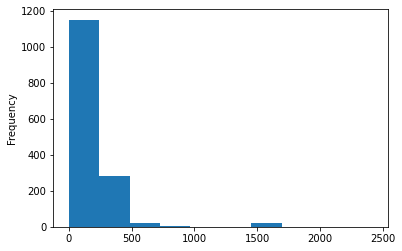

In [27]:
df_vakances_raw["salary_range"] = df_vakances_raw["alga līdz"] - df_vakances_raw["alga no"]
df_vakances_raw["salary_range"].plot.hist(bins=10)

# Save DataFrame
## Save DataFrame as Excel
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html <br/>
!!! need to install <strong>openpyxl</strong> package or <strong>xlsxwriter</strong> package (depending which engine is used).
### to_excel method

In [18]:
df_vakances_raw.to_excel(excel_writer='vakances-2022-05-04_modif.xlsx',
sheet_name='vakances',
index=False, # False - do not show index ID's in the first column. Index ID = row ID (starting from 0)
engine = 'openpyxl') # Default. Support also: xlsxwriter

## Save multiple DataFrames in Excel

In [11]:
# If executed again - will overwrite result
with pd.ExcelWriter(path='vakances-2022-05-04_multiple_sheets.xlsx') as df:
        df_vakances_raw.to_excel(excel_writer=df, sheet_name='first_sheet', index=False)
        df_vakances_raw.to_excel(excel_writer=df, sheet_name='second_sheet', index=False)

# Plotting
More about plotting: https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html and https://pandas.pydata.org/docs/user_guide/visualization.html#visualization